Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Restoring parameters from \MyModel\CNNModel
7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


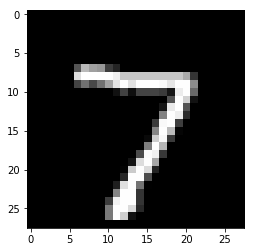

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


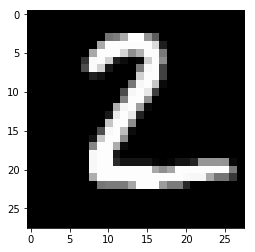

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


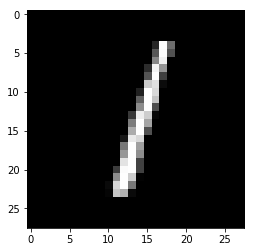

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


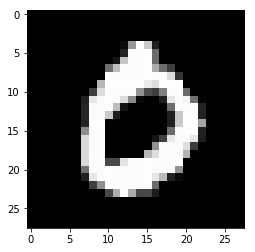

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


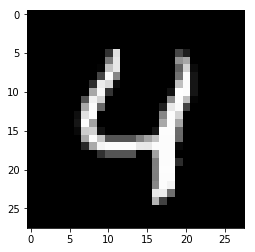

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


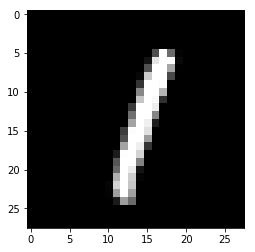

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


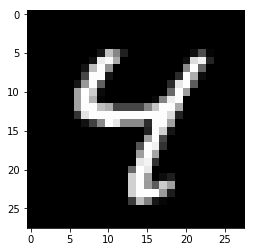

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


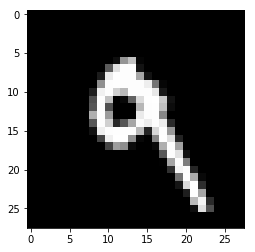

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


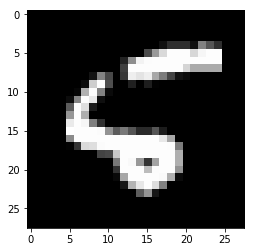

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


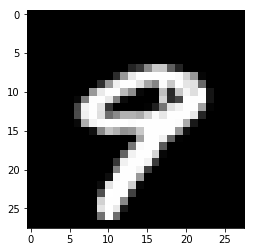

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


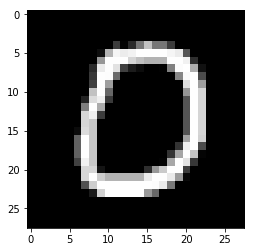

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


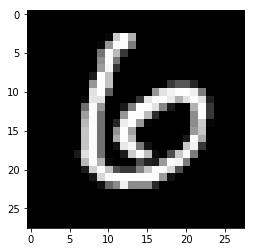

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


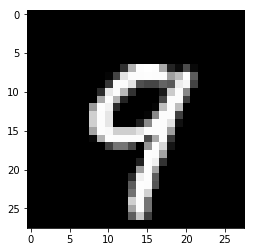

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


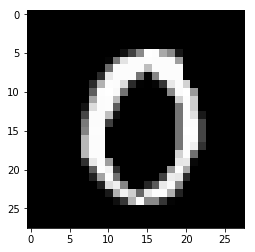

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


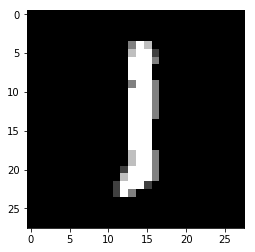

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


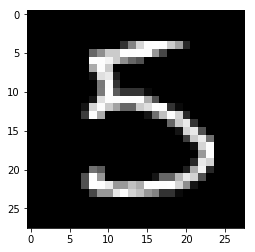

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


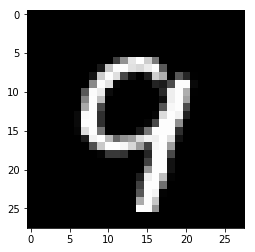

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


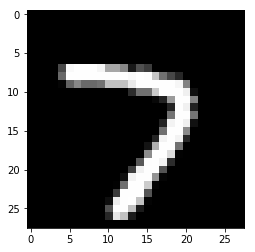

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


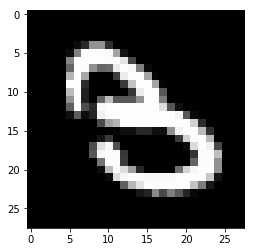

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


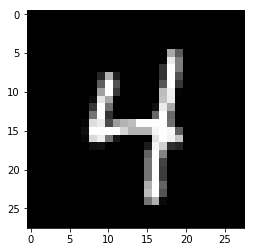

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


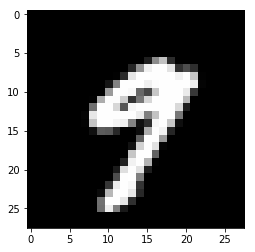

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


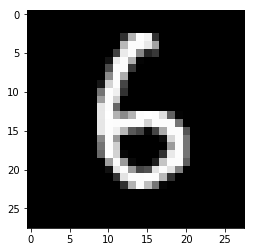

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


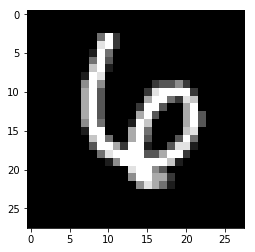

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


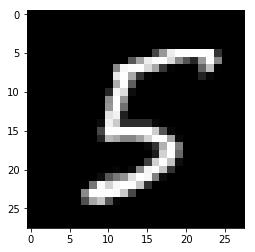

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


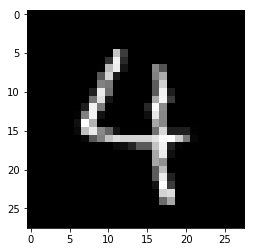

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


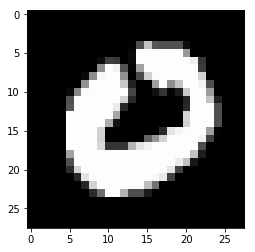

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


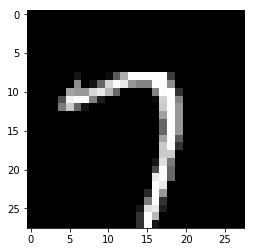

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


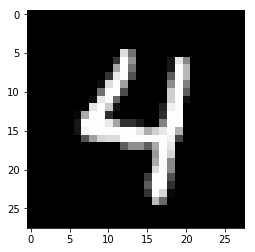

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


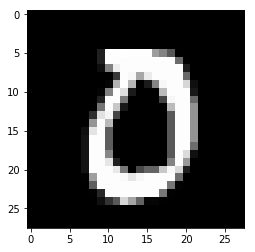

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


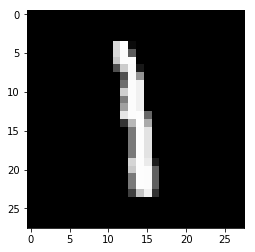

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


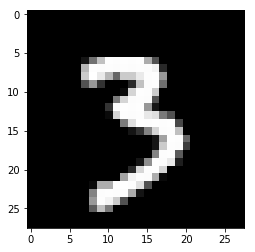

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


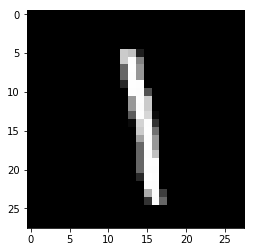

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


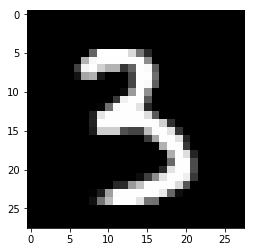

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


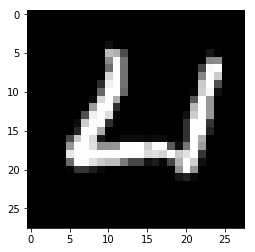

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


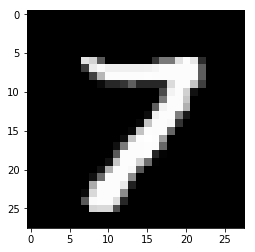

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


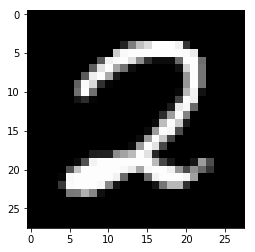

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


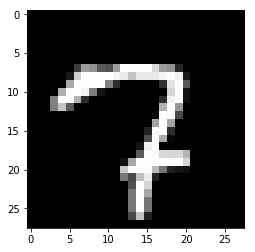

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


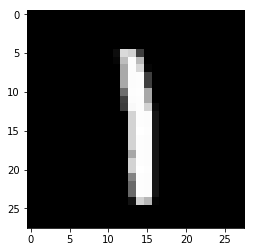

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


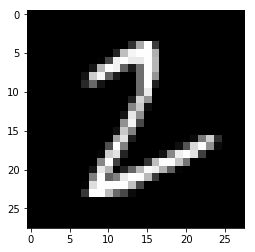

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


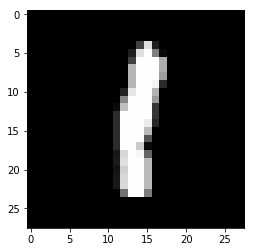

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


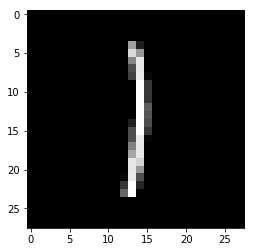

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


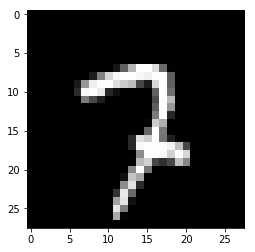

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


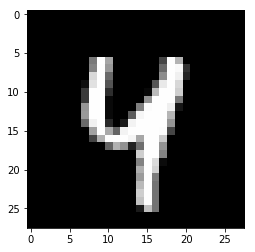

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


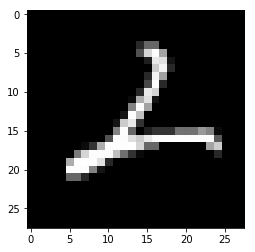

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


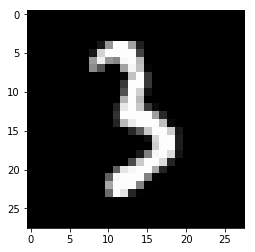

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


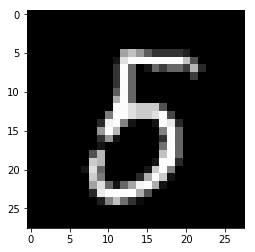

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


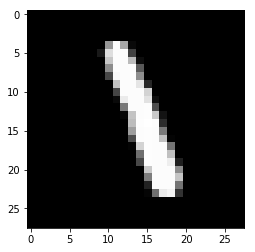

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


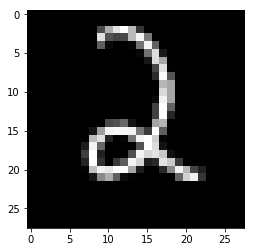

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


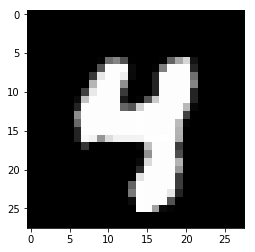

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


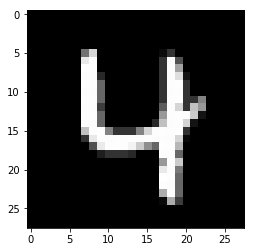

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


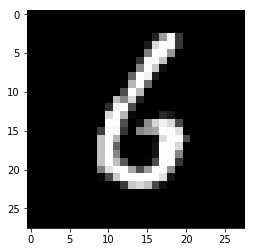

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


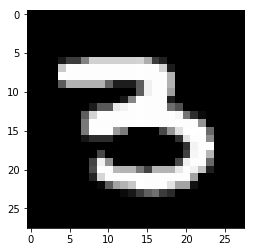

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


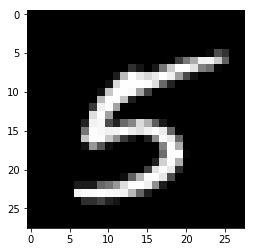

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


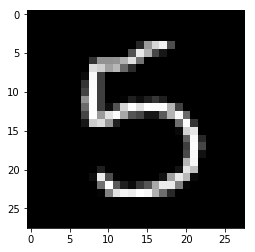

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


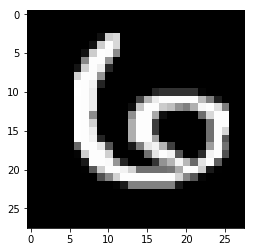

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


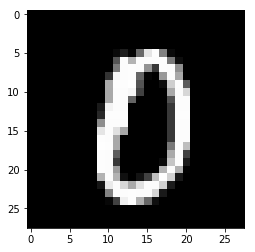

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


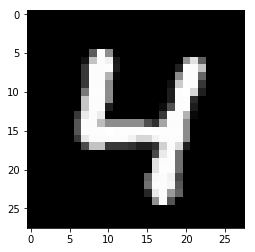

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


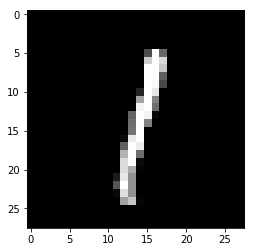

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


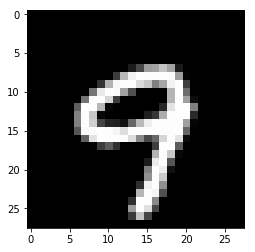

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


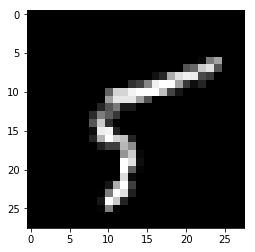

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


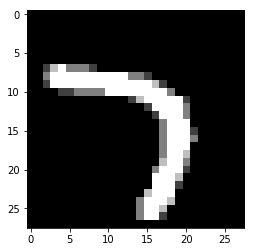

8
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


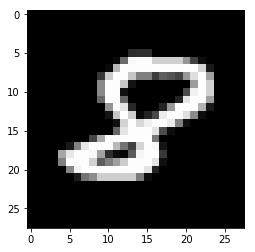

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


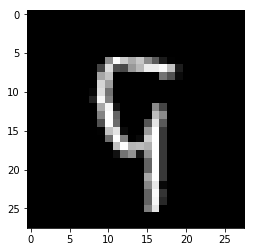

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


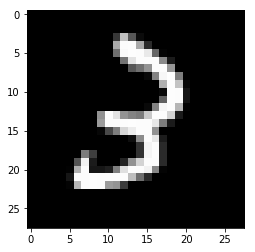

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


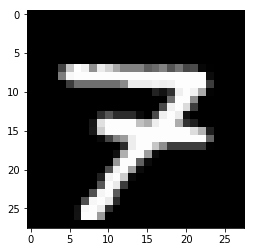

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


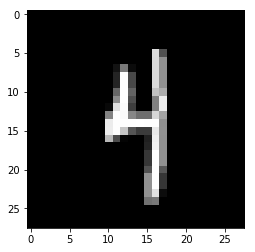

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


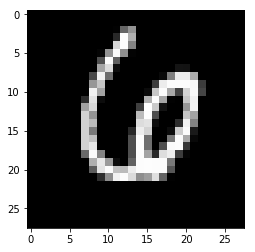

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


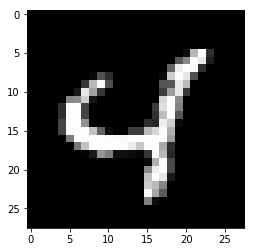

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


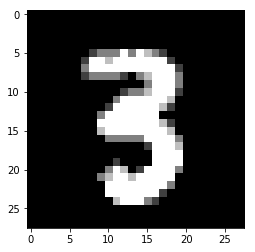

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


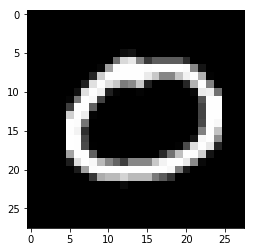

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


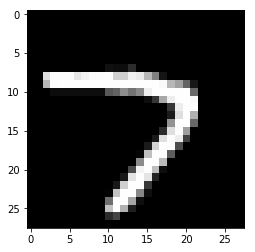

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


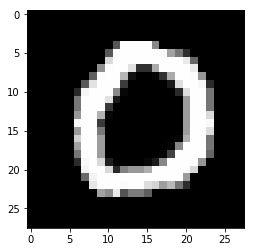

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


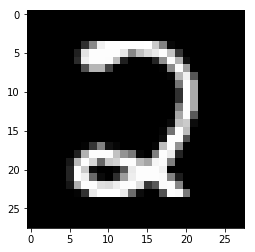

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


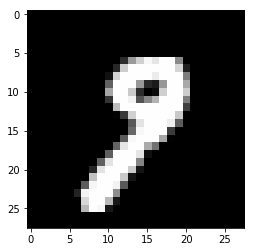

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


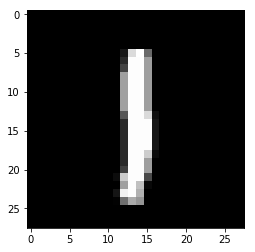

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


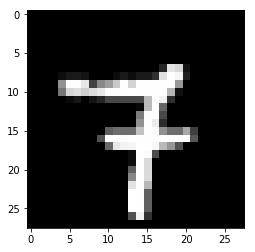

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


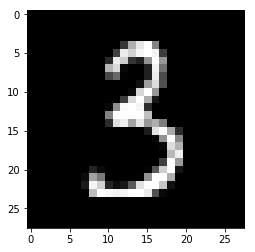

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


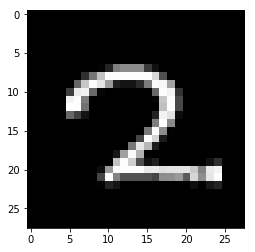

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


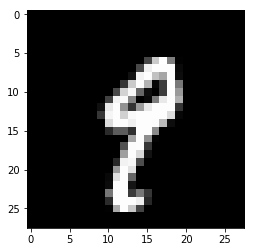

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


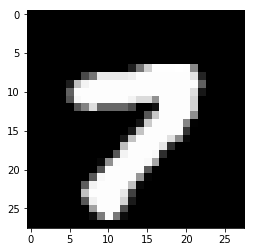

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


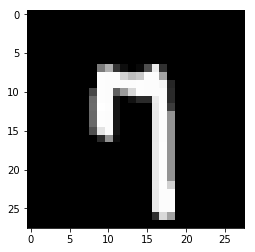

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


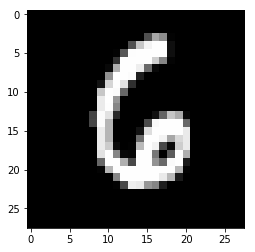

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


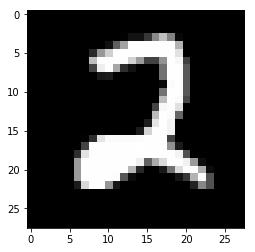

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


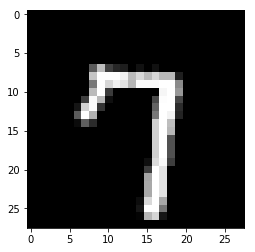

8
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


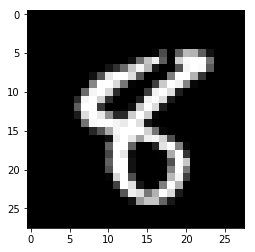

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


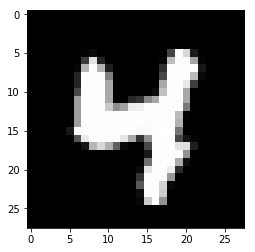

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


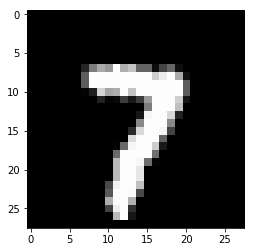

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


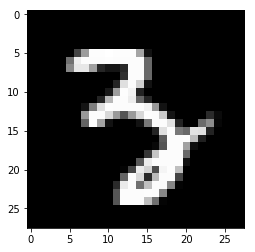

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


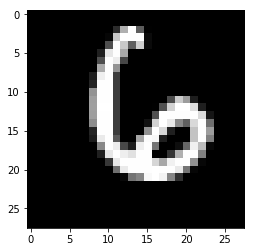

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


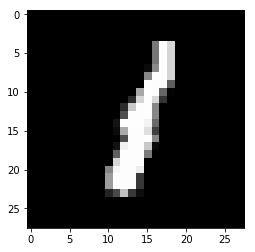

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


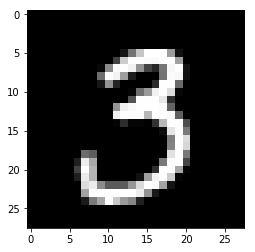

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


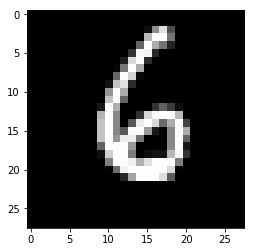

4
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


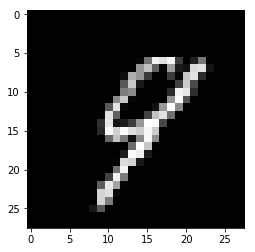

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


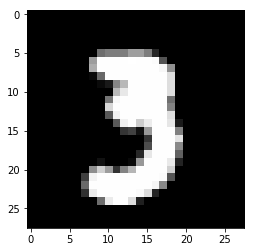

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


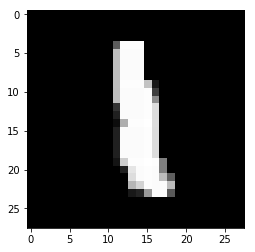

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


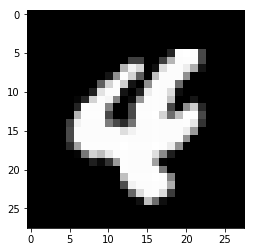

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


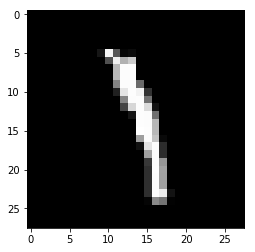

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


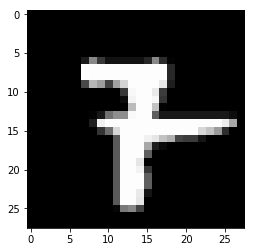

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


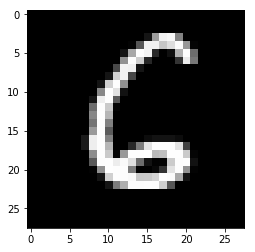

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


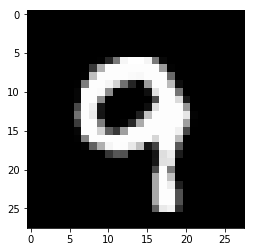

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


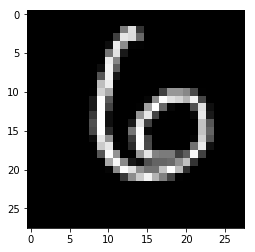

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


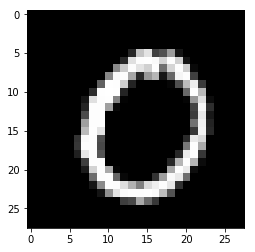

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


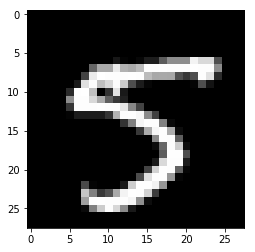

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


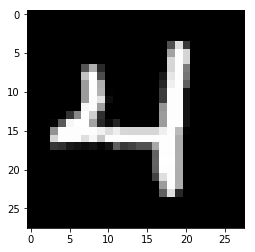

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


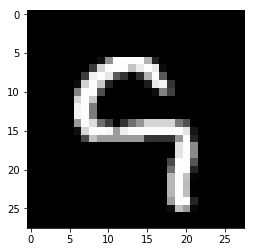

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


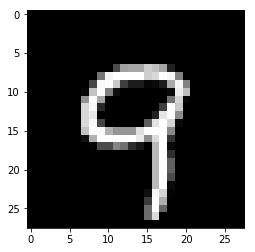

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


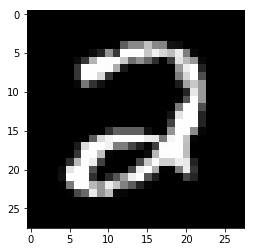

1
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


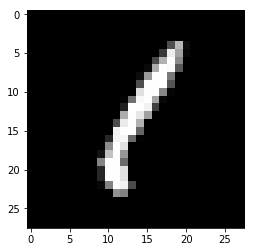

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


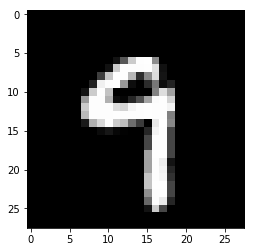

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


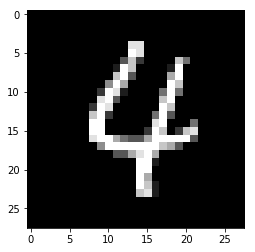

8
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


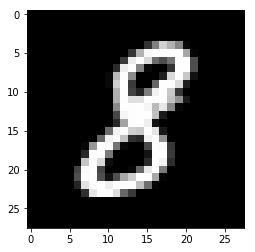

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


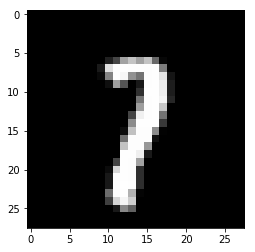

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


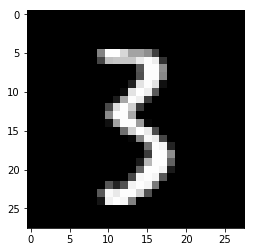

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


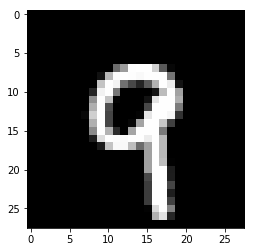

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


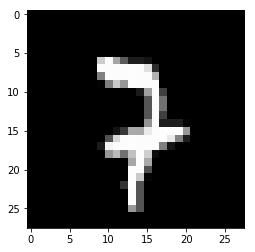

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


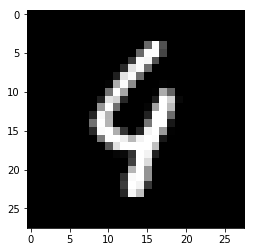

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


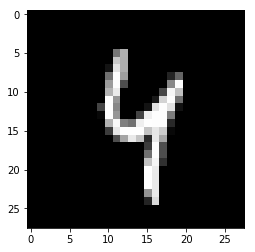

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


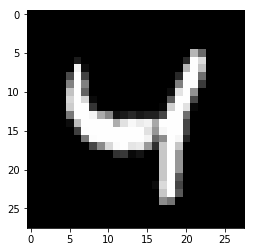

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


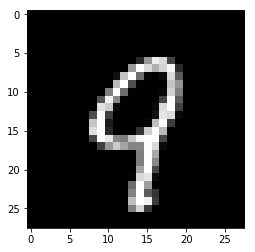

2
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


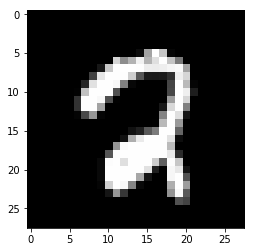

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


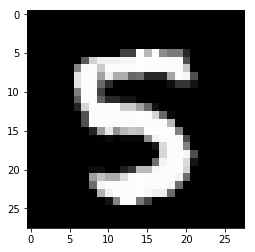

4
[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


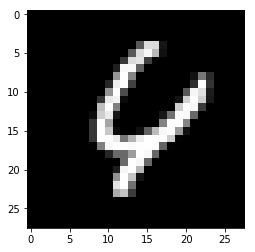

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


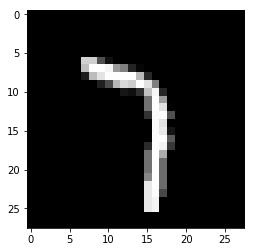

6
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


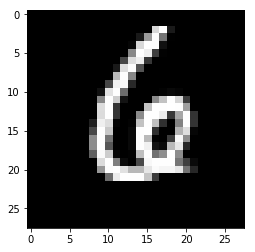

7
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


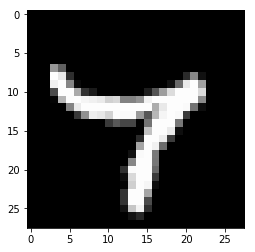

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


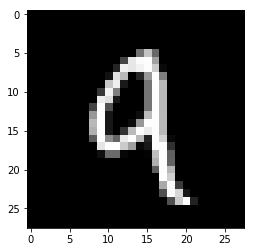

0
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


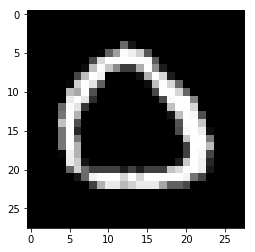

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


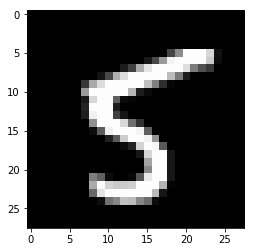

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
sess=tf.Session()    
saver = tf.train.import_meta_graph('C:\\MyModel\\CNNModel.meta')
saver.restore(sess,tf.train.latest_checkpoint('C:\\MyModel'))

#sess.run(tf.global_variables_initializer())
graph = tf.get_default_graph()
training_data = graph.get_tensor_by_name("training_data:0")
training_labels = graph.get_tensor_by_name("training_labels:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
data = mnist.test.images[:128]
labels = mnist.test.labels[:128]

op_to_restore = graph.get_tensor_by_name("predicted_number:0")

hello = sess.run(op_to_restore, feed_dict ={training_data: data,training_labels:labels, keep_prob: 1})
for i in range(0, 128):
    print(hello[i])
    print(labels[i])
    plt.imshow(data[i].reshape(28, 28), cmap = 'gray')
    plt.show()
    